In [1]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from jupyter_dash import JupyterDash
from dash import dcc,html,Input, Output
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,precision_recall_curve,confusion_matrix,ConfusionMatrixDisplay
import seaborn as sns
from ipywidgets import interact,widgets, Layout


In [2]:
percent_of_criminal =np.array([0.2,0.25,0.3,0.4,0.6,0.65,0.68,0.8,0.82,0.91,0.93,0.96])
criminal = np.array([0,0,0,0,1,0,1,1,0,1,1,1])
fpr,tpr,threshold = roc_curve(y_true=criminal,y_score=percent_of_criminal)

### ROC Curve

In [13]:
# def ROC(thr) : 
for thr in range(8) :
        sns.set(font_scale=1.2) 
        plt.style.use('seaborn')
        fig, ax = plt.subplots(figsize=(8,8))

        # ax.plot(fpr[:thr+1],tpr[:thr+1], linewidth=2) ## 하나씩 만드는 plot
        ax.plot(fpr,tpr, linewidth=2) ## 완성된 plot
        plt.xlabel('FP rate',fontsize=18)
        plt.ylabel('TP rate',fontsize=18)
        plt.xlim(-0.02,1.01)
        plt.ylim(-0.02,1.01)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)

        #점표현
        ax.plot([fpr[thr]],[tpr[thr]],'ro')
        # plt.arrow(x=0.7, y=0.3, dx=(fpr[thr]-0.67), dy=(tpr[thr]-0.295), width=0.003, facecolor='red',alpha=0.5, edgecolor='none') 
        plt.annotate('-', xy=(fpr[thr],tpr[thr]), xytext=(0.65,0.3),
                fontsize=14, ha='center',
                arrowprops=dict(facecolor='red', alpha=0.5, width=1.5, shrink=0.1, headwidth=7))


        ax2 = fig.add_axes([0.55, 0.2, 0.25, 0.3])
        pred_log = (percent_of_criminal >= threshold[thr])
        con_max = confusion_matrix(criminal,pred_log,labels=[1, 0])
        ConfusionMatrixDisplay(con_max).plot(colorbar=False,cmap='PuBu',ax=ax2)
        ax2.set_xticklabels(['Positive','Negative'])
        ax2.set_yticklabels(['Positive','Negative'])
        ax2.xaxis.set_label_position('top') 
        ax2.xaxis.tick_top()
        ax2.grid(False)
#     return ax

        ## figure save
        plt.savefig(f'save_fig/{thr+1}.png')
        plt.close()
        plt.ioff()

In [4]:
# %matplotlib inline
from ipywidgets.embed import embed_minimal_html

slider = widgets.IntSlider(min=0,max=7,step=1, value=0, layout=Layout(width='500px'))
# slider = widgets.FloatSlider(min=1,max=0,step=0.125, value=0, layout=Layout(width='500px'))
slider.style.handle_color = 'lightblue'
interact(ROC, thr=slider)

NameError: name 'ROC' is not defined

### PE_RC Curve

In [11]:
for thr in range(8) :
    # plt setting
    fig, ax = plt.subplots(figsize=(8,8))
    plt.style.use('seaborn')

    # Precision Recall
    rc_a =[0,1/6,3/6,3/6,5/6,5/6,1,1]
    pe_a =[1,1,1,3/4,5/6,5/7,6/8,6/12]

    # Precision Recall plot
    ax.plot(rc_a, pe_a,color='tab:orange',label='PE/RC')
    # Base Rate Plot
    ax.plot([0,1],[0.5,0.5],color='black', linestyle='--',label='Base_rate')
    # dot plot
#     ax.plot([rc_a,rc_a],[pe_a,pe_a],'bo') 
    ax.plot([rc_a[thr],rc_a[thr]],[pe_a[thr],pe_a[thr]],'bo') 

    # annot
    ax.annotate('-', xy=(rc_a[thr],pe_a[thr]), xytext=(0.3,0.65),
            fontsize=14, ha='center',
            arrowprops=dict(facecolor='blue', alpha=0.5, width=1.5, shrink=0.1, headwidth=7))

    # figure styling
    ax.set_xlabel('\nRecall\n',fontdict=dict(fontsize=18))
    ax.set_ylabel('\nPrecision\n',fontdict=dict(fontsize=18))
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    ax.legend(loc=0,fontsize=14)
    ax.set_title('Precision-Recall Curve\n',fontdict=dict(fontsize=22))
    ax.set_xlim([-0.01,1.02])
    ax.set_ylim([0.46,1.02])


    # Confusion Matrix
    ax2 = fig.add_axes([0.25, 0.2, 0.25, 0.25]) # [left, bottom, width, height]
    pred_log = (percent_of_criminal >= threshold[thr])
    con_max = confusion_matrix(criminal,pred_log,labels=[1, 0])
    ConfusionMatrixDisplay(con_max).plot(colorbar=False,cmap='PuBu',ax=ax2)

    # figure styling
    ax2.set_xticklabels(['Positive','Negative'])
    ax2.set_yticklabels(['Positive','Negative'])
    ax2.xaxis.set_label_position('top') 
    ax2.xaxis.tick_top()
    ax2.grid(False)


    #figure save
    plt.savefig(f'save_fig/{thr+1}.png')
    plt.close()
    plt.ioff()

### Roc curve 여러개

In [4]:

a_suspect =np.array([0.2,0.25,0.3,0.4,0.6,0.65,0.68,0.8,0.82,0.91,0.93,0.96])
a_criminal = np.array([0,0,0,0,1,0,1,1,0,1,1,1])

b_suspect =[0.2,0.35,0.37,0.45,0.49,0.55,0.66,0.78,0.85,0.88,0.95,0.99]
b_criminal = [0,0,0,0,0,1,0,1,1,1,1,1]

c_suspect =[0.4,0.5,0.6,0.66,0.7,0.81,0.83,0.85,0.93,0.91,0.93,0.97]
c_criminal = [0,0,1,0,1,0,1,0,1,1,0,1]

fpr_a,tpr_a,threshold_a = roc_curve(y_true=a_criminal,y_score=a_suspect)
fpr_b,tpr_b,threshold_b = roc_curve(b_criminal,b_suspect)
fpr_c,tpr_c,threshold_c = roc_curve(c_criminal,c_suspect)

(-0.01, 1.02)

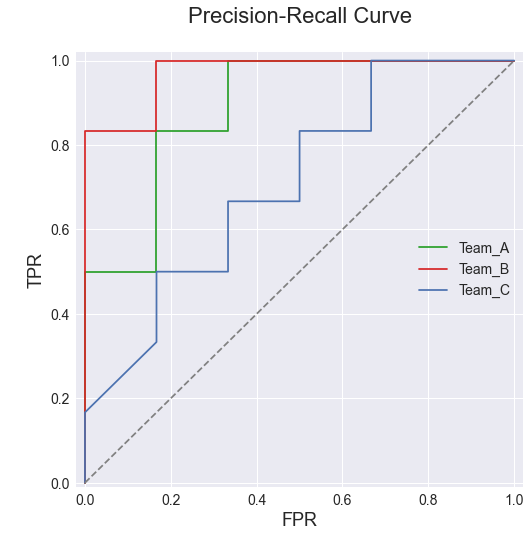

In [20]:
plt.style.use('seaborn')
plt.figure(figsize=(8,8))
plt.plot(fpr_a,tpr_a,label='Team_A',color='tab:green')
plt.plot(fpr_b,tpr_b,label='Team_B',color='tab:red')
plt.plot(fpr_c,tpr_c,label='Team_C')
plt.plot([0,1],[0,1],color='grey',linestyle='--')

#figure styling
plt.title('Precision-Recall Curve\n',fontdict=dict(fontsize=22))
plt.xlabel('FPR\n',fontdict=dict(fontsize=18))
plt.ylabel('\nTPR',fontdict=dict(fontsize=18))
plt.legend(loc=7,fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim([-0.02,1.02])
plt.ylim([-0.01,1.02])

In [11]:
# import inspect
# inspect.getfullargspec(ff.create_annotated_heatmap)

In [13]:
thr = 0
pred_log = (percent_of_criminal >= threshold[thr])
con_max = confusion_matrix(criminal,pred_log,labels=[1, 0])
fig = px.imshow(con_max, color_continuous_scale='BuPu',width=400,height=400, labels=dict(x='Predict Labels', y='True Labels'),x=['Positive','Negative'], y=['True','False'])
fig.update_xaxes(side='top')
fig.show()

In [14]:
thr=4
# subplots
left_width = 0.7
# fig = make_subplots(rows=1, cols=2,column_widths=[left_width, 1 - left_width])
fig = make_subplots(rows=3, cols=3,specs=[[{"colspan": 2, 'rowspan' : 3},None, None],[None,None,{}],[None,None,None]])
# subplot 1번에 넣기
fig_2 = px.line(x=fpr[:thr+1],y=tpr[:thr+1])
fig.append_trace(fig_2.data[0],row=1,col=1)

# subplot 1번에 있는 plot과 합치기

# base classifier
fig.add_trace(
    go.Scatter(
        x=[0, 1],
        y=[0, 1],
        mode="lines",
        line=go.scatter.Line(color="gray"),
        showlegend=False),row=1,col=1)
# dot
fig.add_trace(
    go.Scatter(
        x=[fpr[thr]],
        y=[tpr[thr]],
        showlegend=False,
        marker=dict(color="red", size=10)),
        row=1,col=1)

# subplot 2번에 넣기
pred_log = (percent_of_criminal >= threshold[thr])
con_max = confusion_matrix(criminal,pred_log,labels=[1, 0])
fig_3 = px.imshow(con_max, text_auto=True ,color_continuous_scale='BuPu',x=['Positive','Negative'], y=['False','True'])
fig_3.update_traces(dict(showscale=False, 
                    coloraxis=None, 
                    colorscale='BuPu'), selector={'type':'heatmap'})
fig_3.update_xaxes(side='top')

fig_3.update_xaxes(side='top')
fig.add_trace(fig_3.data[0],row=2,col=3)

# plot update
fig.update_layout(width=800,height=600)
fig.update_xaxes(title_text="Predict Value",row=2,col=3,side='top')
fig.update_yaxes(title_text="True Value",row=2,col=3)


In [15]:

app = JupyterDash(__name__)
server = app.server

#marker
marker = {0: '100%', 1: '96%', 2: '91%', 3: '82%', 4: '68%', 5: '65%', 6: '60%', 7: '0%'}
# marker = {num : str(i) for num,i in enumerate(threshold)}

## Color 조정하는 DIV
# app.layout =html.Div([
#     html.H1('ROC_Curve', style={'text-align': 'center'}),
#     # html.Iframe(id='curve', srcDoc=None,style={'width' : '100%', 'height' : '500px' }),
#     html.Div([
#         "Threshold",
#         dcc.Slider(0, 7, 1, value=0, id='thr', marks=marker)],
#         # style=dict(width=600),
#         style = {"width": "2%", "height":"100%","display":"inline-block","position":"relative"}            
#         ),
#     dcc.Graph(id='curve'),
#     # html.Div(["색상",dcc.RadioItems(id='color', value='aliceblue', options=c_codes['0'], className='btn-group', style={'flex-wrap' : 'wrap'},labelClassName= 'btn-outline-secondary',labelStyle={'text-align' : 'left', 'width' : 180, 'height' : 25  } ,inputStyle={'margin-right': 5})],style={'margin': 20}) #inline=True,
# ])



app.layout=html.Div([
                html.H1('ROC_Curve', style={'text-align': 'center'}),
                html.Div([
                    html.Div([
                        'Threshold',
                        dcc.Slider(0, 7, 1, value=0, id='thr', 
                        marks=marker,vertical=True)
                        
                    ],
                    style = {"width": "7%", "height":"100%","display":"inline-block","position":"relative",'text-align' : 'center'},
                    className='col'
                    ),
                    dcc.Graph(id='curve',className='col-md-auto'),
                ],
                style={'justify-content': 'center','align-items' : 'center'},
                className='row row-cols-auto'
                )
           ],
           className='container'
           )

@app.callback(
    Output(component_id='curve',component_property='figure'),
    Input('thr','value') # Input('location','value'),
)


def roc_df(thr) :
    # subplots
    fig = make_subplots(rows=3, cols=3,specs=[[{"colspan": 2, 'rowspan' : 3},None, None],[None,None,{}],[None,None,None]],horizontal_spacing=0.15)
    # subplot 1번에 넣기
    fig_2 = px.line(x=fpr[:thr+1],y=tpr[:thr+1])
    fig.append_trace(fig_2.data[0],row=1,col=1)
    # subplot 1번에 있는 plot과 합치기

    # base classifier
    # fig.add_trace(
    #     go.Scatter(
    #         x=[0, 1],
    #         y=[0, 1],
    #         mode="lines",
    #         line=go.scatter.Line(color="gray"),
    #         showlegend=False),row=1,col=1)

    # dot
    fig.add_trace(
        go.Scatter(
            x=[fpr[thr]],
            y=[tpr[thr]],
            showlegend=False,
            marker=dict(color="red", size=10)),
            row=1,col=1)

    # subplot 2번에 넣기
    pred_log = (percent_of_criminal >= threshold[thr])
    con_max = confusion_matrix(criminal,pred_log,labels=[1, 0])
    fig_3 = px.imshow(con_max, text_auto=True ,color_continuous_scale='BuPu',x=['Positive','Negative'], y=['True','False'])
    fig_3.update_traces(dict(showscale=False, 
                        coloraxis=None, 
                        colorscale='BuPu'), selector={'type':'heatmap'})
    fig_3.update_xaxes(side='top')
    fig.add_trace(fig_3.data[0],row=2,col=3)

    # plot update
    fig.update_layout(width=800,height=600)
    fig.update_xaxes(title_text="Predict Value",row=2,col=3,side='top')
    fig.update_yaxes(title_text="True Value",row=2,col=3,autorange='reversed')
    fig.update_xaxes(title_text='FP Rate',range=[-0.02,1.02], row=1,col=1)
    fig.update_yaxes(title_text='TP Rate',range=[-0.02,1.02], row=1,col=1)

    return fig


app.run_server(mode='external')

Dash app running on http://127.0.0.1:8050/


In [4]:
b_suspect =[0.2,0.35,0.37,0.45,0.49,0.55,0.66,0.78,0.85,0.88,0.95,0.99]
b_criminal = [0,0,0,0,0,1,0,1,1,1,1,1]

c_suspect =[0.4,0.5,0.6,0.66,0.7,0.81,0.83,0.85,0.93,0.91,0.93,0.97]
c_criminal = [0,0,1,0,1,0,1,0,1,1,0,1]

fpr_b,tpr_b,threshold_b = roc_curve(b_criminal,b_suspect)
fpr_c,tpr_c,threshold_c = roc_curve(c_criminal,c_suspect)

In [5]:
# ROC Curve

fig = px.line(x=fpr,y=tpr)
fig.update_traces(line_color='darkgreen',opacity=0.5,name='Team_A',showlegend=True)

fig_2 = px.line(x=fpr_b,y=tpr_b)
fig_2.update_traces(line_color='orange',opacity=0.5,name='Team_B',showlegend=True)
fig.add_trace(fig_2.data[0])

fig_3 = px.line(x=fpr_c,y=tpr_c)
fig_3.update_traces(line_color='darkmagenta',opacity=0.5,name='Team_C',showlegend=True)
fig.add_trace(fig_3.data[0])

fig_4 = px.line(x=[0,1],y=[0,1])
fig_4.update_traces(line=dict(dash="dot", width=2),line_color='gray',opacity=0.5,name='Base_rate',showlegend=True)
fig.add_trace(fig_4.data[0])


# plot update
fig.update_layout(width=600,height=600)
fig.update_xaxes(title_text='FP Rate',range=[-0.02,1.02])
fig.update_yaxes(title_text='TP Rate',range=[-0.02,1.02])

fig.show()

from plotly.io import write_image
#... Generate the fig here.
fig.write_json("ROC_curve.json")


In [ ]:
# Precision Recall 
app = JupyterDash(__name__)

#marker
marker = {7: '100%', 6: '96%', 5: '91%', 4: '82%', 3: '68%', 2: '65%', 1: '60%', 0: '0%'}
# marker = {num : str(i) for num,i in enumerate(threshold)}

## Color 조정하는 DIV
# app.layout =html.Div([
#     html.H1('ROC_Curve', style={'text-align': 'center'}),
#     # html.Iframe(id='curve', srcDoc=None,style={'width' : '100%', 'height' : '500px' }),
#     html.Div([
#         "Threshold",
#         dcc.Slider(0, 7, 1, value=0, id='thr', marks=marker)],
#         # style=dict(width=600),
#         style = {"width": "2%", "height":"100%","display":"inline-block","position":"relative"}            
#         ),
#     dcc.Graph(id='curve'),
#     # html.Div(["색상",dcc.RadioItems(id='color', value='aliceblue', options=c_codes['0'], className='btn-group', style={'flex-wrap' : 'wrap'},labelClassName= 'btn-outline-secondary',labelStyle={'text-align' : 'left', 'width' : 180, 'height' : 25  } ,inputStyle={'margin-right': 5})],style={'margin': 20}) #inline=True,
# ])



app.layout=html.Div([
                html.H1('ROC_Curve', style={'text-align': 'center'}),
                html.Div([
                        html.Img(src=app.get_asset_url('main_4.png'),
                        style= {'width':'800px','margin' : '0 auto'}
                        ),
                        dcc.Slider(0, 7, 1, value=7, id='thr', 
                        marks=marker)
                    ],
                    style= {'width':'800px','text-align':'left','margin' : '0 auto'}
                    ),
                html.Div([
                    dcc.Graph(id='curve',className='col-md-auto'),
                ],
                style={'justify-content': 'center','align-items' : 'center'},
                className='row row-cols-auto'
                )
           ],
           className='container'
           )

@app.callback(
    Output(component_id='curve',component_property='figure'),
    Input('thr','value') # Input('location','value'),
)


def Pe_rc_curve(thr) :
    thr = -1-thr
    pe_a =[1,1,1,3/4,5/6,5/7,6/8,6/12]
    rc_a =[0,1/6,3/6,3/6,5/6,5/6,1,1]

    fig = make_subplots(rows=3, cols=3,specs=[[{"colspan": 2, 'rowspan' : 3},None, None],[None,None,{}],[None,None,None]],horizontal_spacing=0.15)

    fig_1 = px.line(x=rc_a,y=pe_a)
    fig_1.update_traces(line_color='darkgreen',opacity=0.5,name='Team_A',showlegend=True)
    fig.append_trace(fig_1.data[0],row=1,col=1)
        
    fig.add_trace(
    go.Scatter(
        x=[rc_a[thr]],
        y=[pe_a[thr]],
        showlegend=False,
        marker=dict(color="red", size=10)),
        row=1,col=1)

    fig_4 = px.line(x=[0,1],y=[0.5,0.5])
    fig_4.update_traces(line=dict(dash="dot", width=2),line_color='gray',opacity=0.5,name='Base_rate',showlegend=True)
    fig.add_trace(fig_4.data[0],row=1,col=1)

    # subplot 2번에 넣기
    pred_log = (percent_of_criminal >= threshold[thr])
    con_max = confusion_matrix(criminal,pred_log,labels=[1, 0])
    fig_3 = px.imshow(con_max, text_auto=True ,color_continuous_scale='BuPu',x=['Positive','Negative'], y=['True','False'])
    fig_3.update_traces(dict(showscale=False, 
                        coloraxis=None, 
                        colorscale='BuPu'), selector={'type':'heatmap'})
    fig_3.update_xaxes(side='top')
    fig.add_trace(fig_3.data[0],row=2,col=3)

    # plot update
    fig.update_layout(width=800,height=600)
    fig.update_xaxes(title_text="Predict Value",row=2,col=3,side='top')
    fig.update_yaxes(title_text="True Value",row=2,col=3,autorange='reversed')
    fig.update_xaxes(title_text='Recall',range=[-0.01,1.02], row=1,col=1)
    fig.update_yaxes(title_text='Precision',range=[0.45,1.02], row=1,col=1)

    return fig

app.run_server(mode='external')

Dash app running on http://127.0.0.1:8050/
